In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
import math
from scipy.optimize import curve_fit

In [3]:
df = pd.read_csv('Ca-Data-BrainZell.csv', index_col=0)
print(df.shape)
df.head()

(385, 720)


,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,...,Column716,Column717,Column718,Column719,Column720,Column721,Column722,Column723,Column724,Column725
Column5,,,,,,,,,,,,,,,,,,,,,
Well,0,1.05,1.58,2.09,2.63,3.14,3.67,4.19,4.72,5.23,...,378.48,379.02,379.55,380.08,380.61,381.16,381.69,382.23,382.77,383.3
A1,6286,6311.00,6305.00,6307.00,6320.00,6316.00,6333.00,6355.00,6348.00,6346.00,...,6915.00,6932.00,6933.00,6917.00,6928.00,6917.00,6950.00,6944.00,6956.00,6917.0
A2,6425,6492.00,6492.00,6478.00,6512.00,6494.00,6512.00,6513.00,6515.00,6539.00,...,7285.00,7279.00,7294.00,7276.00,7289.00,7285.00,7284.00,7305.00,7281.00,7299.0
A3,7635,7692.00,7710.00,7740.00,7758.00,7727.00,7757.00,7758.00,7744.00,7776.00,...,8074.00,8085.00,8074.00,8074.00,8056.00,8067.00,8094.00,8080.00,8062.00,8090.0
A4,7023,7051.00,7063.00,7098.00,7095.00,7104.00,7117.00,7104.00,7106.00,7114.00,...,7358.00,7379.00,7345.00,7361.00,7339.00,7362.00,7358.00,7371.00,7367.00,7368.0


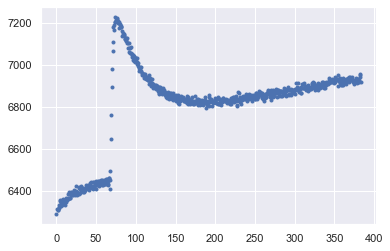

In [4]:
plt.scatter(df.loc[['Well'],], df.loc[['A1'],], marker='.')

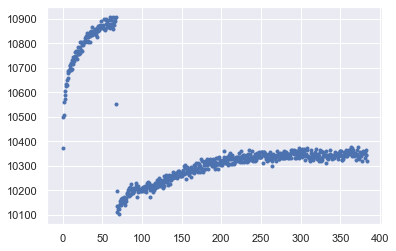

In [5]:
plt.scatter(df.loc[['Well'],], df.loc[['N1'],], marker='.')

In [6]:
def sin_func(x, a, b, c, d):
    def sin_rule(x, a, b, c, d):
        y = a * math.sin(b - x) + c * x**2 + d
        return y
    apply_sin_func = np.vectorize(sin_rule, excluded=['a', 'b', 'c', 'd'])
    y_predicted = apply_sin_func(x, a, b, c, d)
    return y_predicted

In [7]:
x, y = df.loc[['Well'],].values[0], df.loc[['A1'],].values[0]

In [8]:
x

array([  0.  ,   1.05,   1.58,   2.09,   2.63,   3.14,   3.67,   4.19,
         4.72,   5.23,   5.76,   6.28,   6.81,   7.33,   7.86,   8.38,
         8.91,   9.44,   9.97,  10.5 ,  11.02,  11.55,  12.06,  12.59,
        13.11,  13.64,  14.16,  14.69,  15.2 ,  15.73,  16.26,  16.78,
        17.31,  17.83,  18.36,  18.88,  19.41,  19.92,  20.45,  21.  ,
        21.51,  22.05,  22.56,  23.09,  23.61,  24.14,  24.66,  25.19,
        25.72,  26.23,  26.76,  27.28,  27.81,  28.34,  28.86,  29.39,
        29.91,  30.44,  30.98,  31.5 ,  32.03,  32.55,  33.08,  33.61,
        34.13,  34.66,  35.19,  35.7 ,  36.23,  36.75,  37.28,  37.81,
        38.33,  38.86,  39.38,  39.91,  40.44,  40.97,  41.5 ,  42.03,
        42.55,  43.08,  43.61,  44.13,  44.66,  45.19,  45.7 ,  46.23,
        46.76,  47.28,  47.81,  48.34,  48.86,  49.39,  49.92,  50.44,
        50.98,  51.51,  52.03,  52.56,  53.09,  53.61,  54.14,  54.67,
        55.19,  55.72,  56.25,  56.76,  57.3 ,  57.83,  58.34,  58.88,
      

In [9]:
y

array([6286., 6311., 6305., 6307., 6320., 6316., 6333., 6355., 6348.,
       6346., 6334., 6327., 6330., 6357., 6342., 6354., 6361., 6352.,
       6347., 6348., 6333., 6357., 6347., 6365., 6359., 6357., 6360.,
       6384., 6364., 6364., 6391., 6366., 6364., 6384., 6381., 6393.,
       6377., 6393., 6387., 6387., 6378., 6402., 6387., 6379., 6383.,
       6396., 6391., 6424., 6379., 6393., 6389., 6387., 6415., 6382.,
       6414., 6409., 6386., 6400., 6423., 6410., 6411., 6404., 6393.,
       6411., 6395., 6398., 6398., 6402., 6404., 6418., 6409., 6425.,
       6420., 6410., 6427., 6420., 6401., 6419., 6418., 6434., 6416.,
       6416., 6424., 6440., 6414., 6424., 6409., 6442., 6418., 6443.,
       6424., 6427., 6428., 6447., 6428., 6406., 6425., 6432., 6437.,
       6447., 6420., 6428., 6447., 6436., 6447., 6446., 6436., 6452.,
       6451., 6425., 6425., 6442., 6429., 6452., 6441., 6442., 6433.,
       6455., 6429., 6451., 6454., 6432., 6428., 6447., 6461., 6461.,
       6450., 6407.,

In [10]:
popt, _ = curve_fit(sin_func, x, y)

In [11]:
a, b, c, d = popt

In [12]:
a

-0.38929814736584445

In [13]:
b

-0.06884241395883978

In [14]:
c

0.0019416559328609378

In [15]:
d

6713.2486806046345

In [16]:
print(popt)

[-3.89298147e-01 -6.88424140e-02  1.94165593e-03  6.71324868e+03]


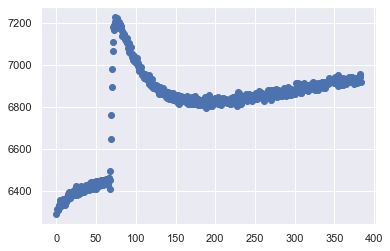

In [18]:
plt.scatter(x, y)

In [20]:
y_pred_latest = sin_func(x, a, b, c, d)
y_pred_latest

array([6713.27545966, 6713.60103214, 6713.64164086, 6713.5810682 ,
       6713.42889635, 6713.24166408, 6713.05590279, 6712.93282887,
       6712.90377664, 6712.97754074, 6713.14224805, 6713.35079824,
       6713.55714386, 6713.70267117, 6713.75684315, 6713.70745928,
       6713.5707301 , 6713.38902095, 6713.21737164, 6713.108361  ,
       6713.09686994, 6713.19160191, 6713.36613571, 6713.59239661,
       6713.80620137, 6713.96405501, 6714.02565688, 6713.98414433,
       6713.86278852, 6713.69377976, 6713.53555598, 6713.44151744,
       6713.44312076, 6713.54912767, 6713.74419865, 6713.97938098,
       6714.20932425, 6714.37275536, 6714.44809749, 6714.41522018,
       6714.303047  , 6714.14314258, 6714.00512703, 6713.9257755 ,
       6713.94438066, 6714.06951701, 6714.2764352 , 6714.52969235,
       6714.77060612, 6714.94241654, 6715.02534166, 6715.00467454,
       6714.90033142, 6714.75592627, 6714.62889225, 6714.56521649,
       6714.59987852, 6714.74115222, 6714.97248779, 6715.23458

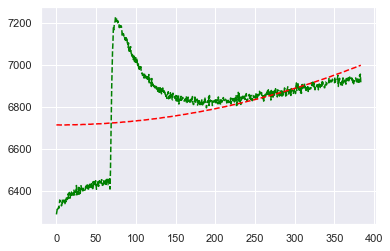

In [22]:
plt.plot(x, y, '--', color='green')
plt.plot(x, y_pred_latest, '--', color='red')
plt.show()

In [24]:
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_pred_latest , y))

R2-score: -3.93


In [ ]:
# The end